In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: xlabel='Churn', ylabel='count'>

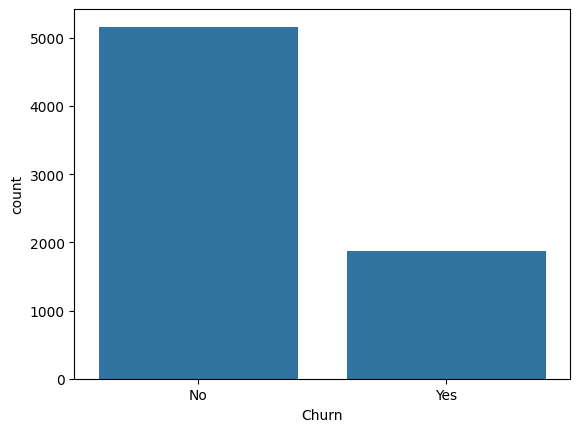

In [9]:
sns.countplot(x = df['Churn'])

<Axes: xlabel='Churn', ylabel='TotalCharges'>

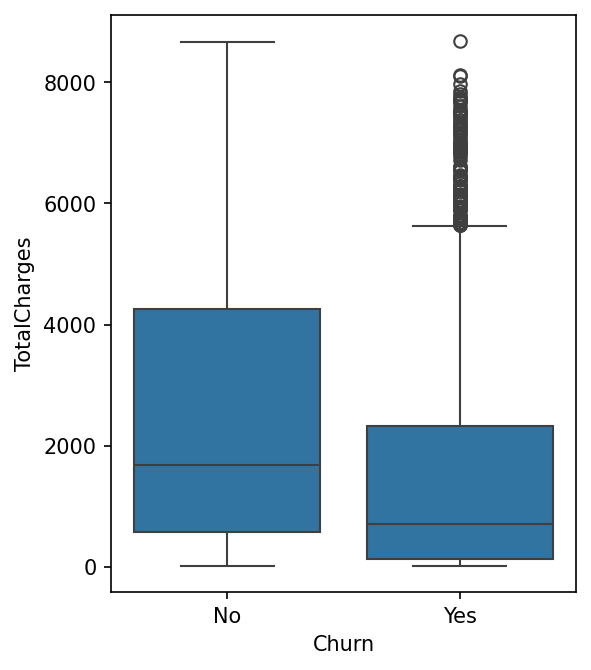

In [29]:
plt.figure(figsize=(4,5), dpi=150)
sns.boxplot(data=df,x='Churn',y='TotalCharges')

In [39]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']], drop_first=True).corr()

In [43]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
InternetService_No                      -0.227578
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691
MultipleLines_Yes                        0.040033


C:\Users\honor\AppData\Local\Temp\ipykernel_3720\669967883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values, palette='coolwarm');


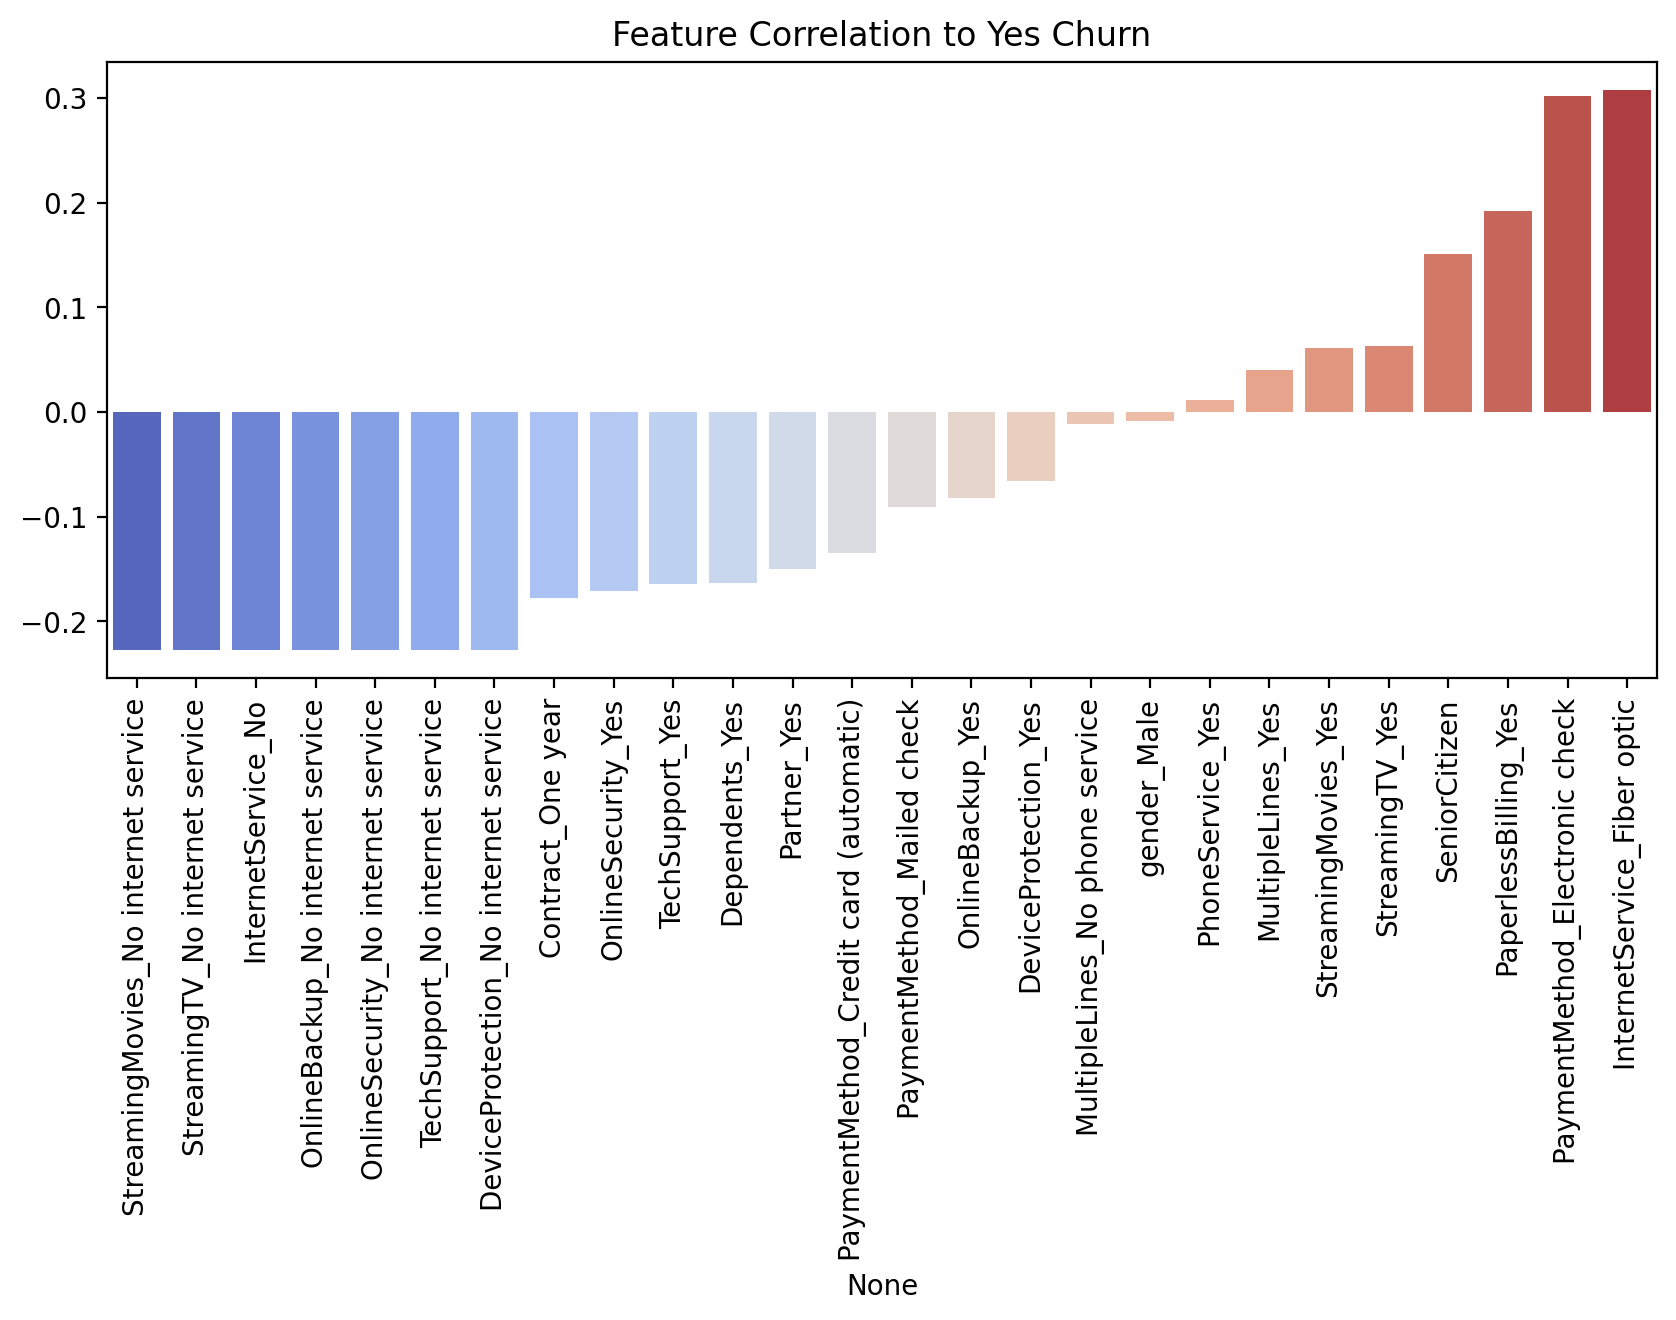

In [48]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values, palette='coolwarm')
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90)

In [49]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='tenure', ylabel='Count'>

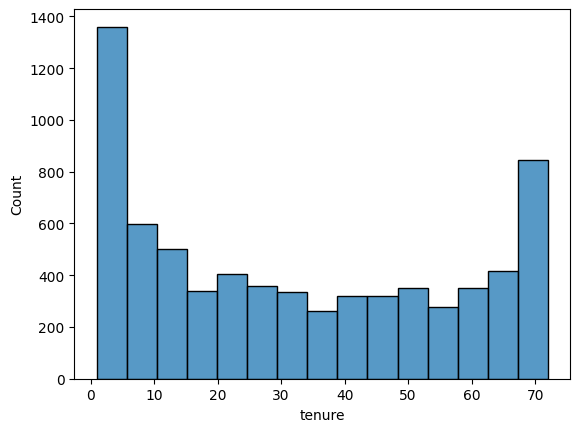

In [50]:
sns.histplot(data=df, x='tenure')

<Figure size 2000x600 with 0 Axes>

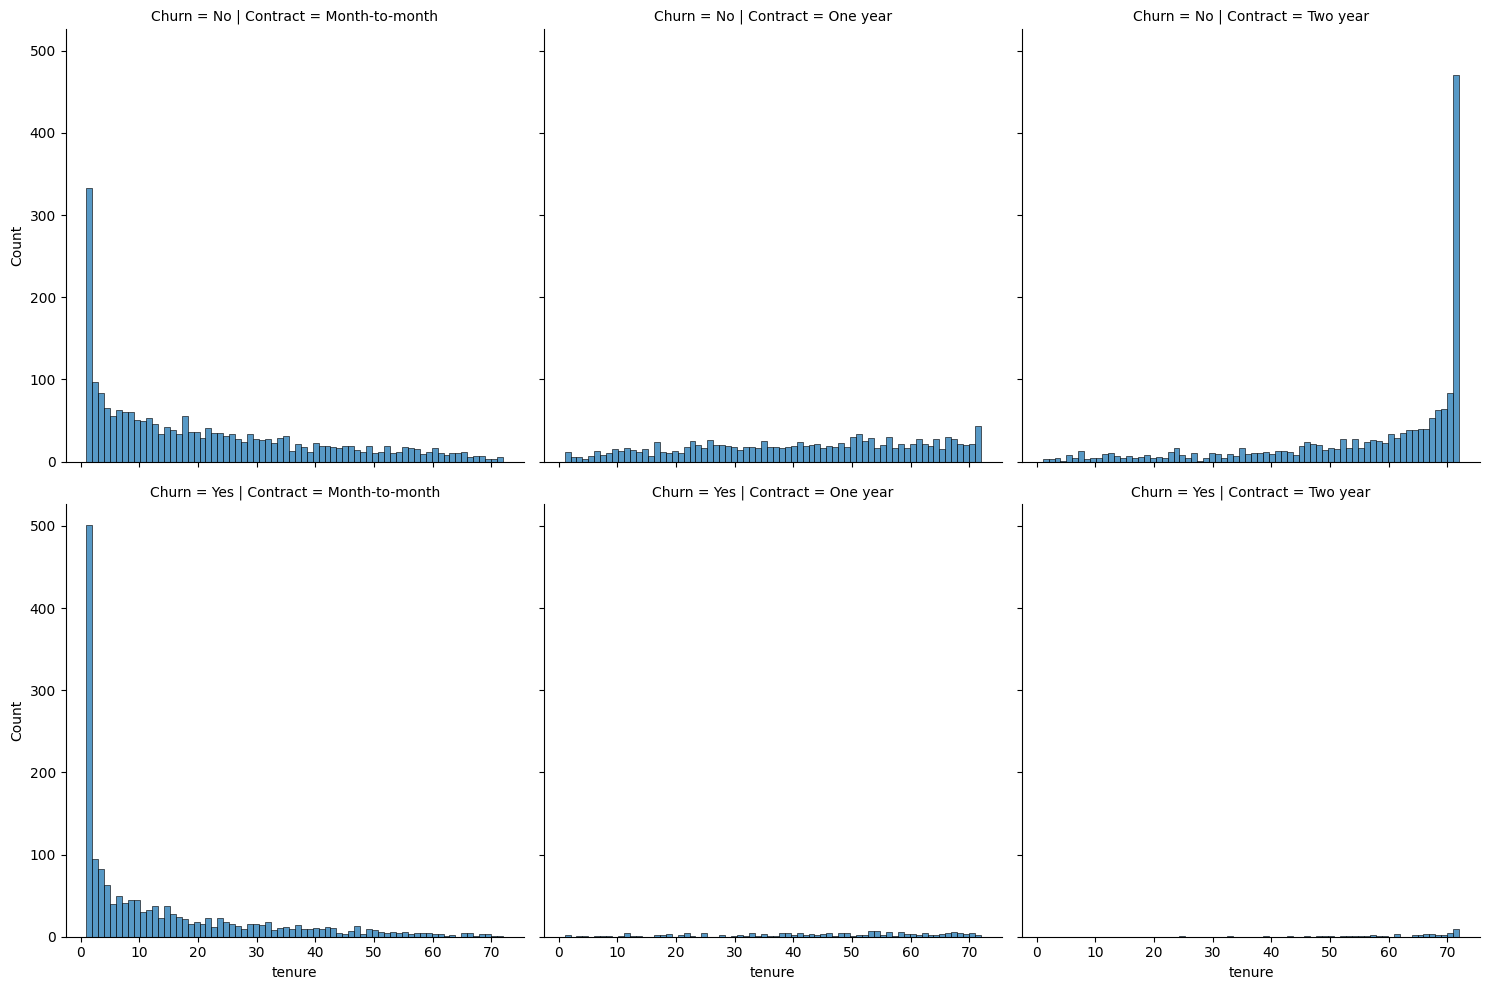

In [51]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

In [54]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

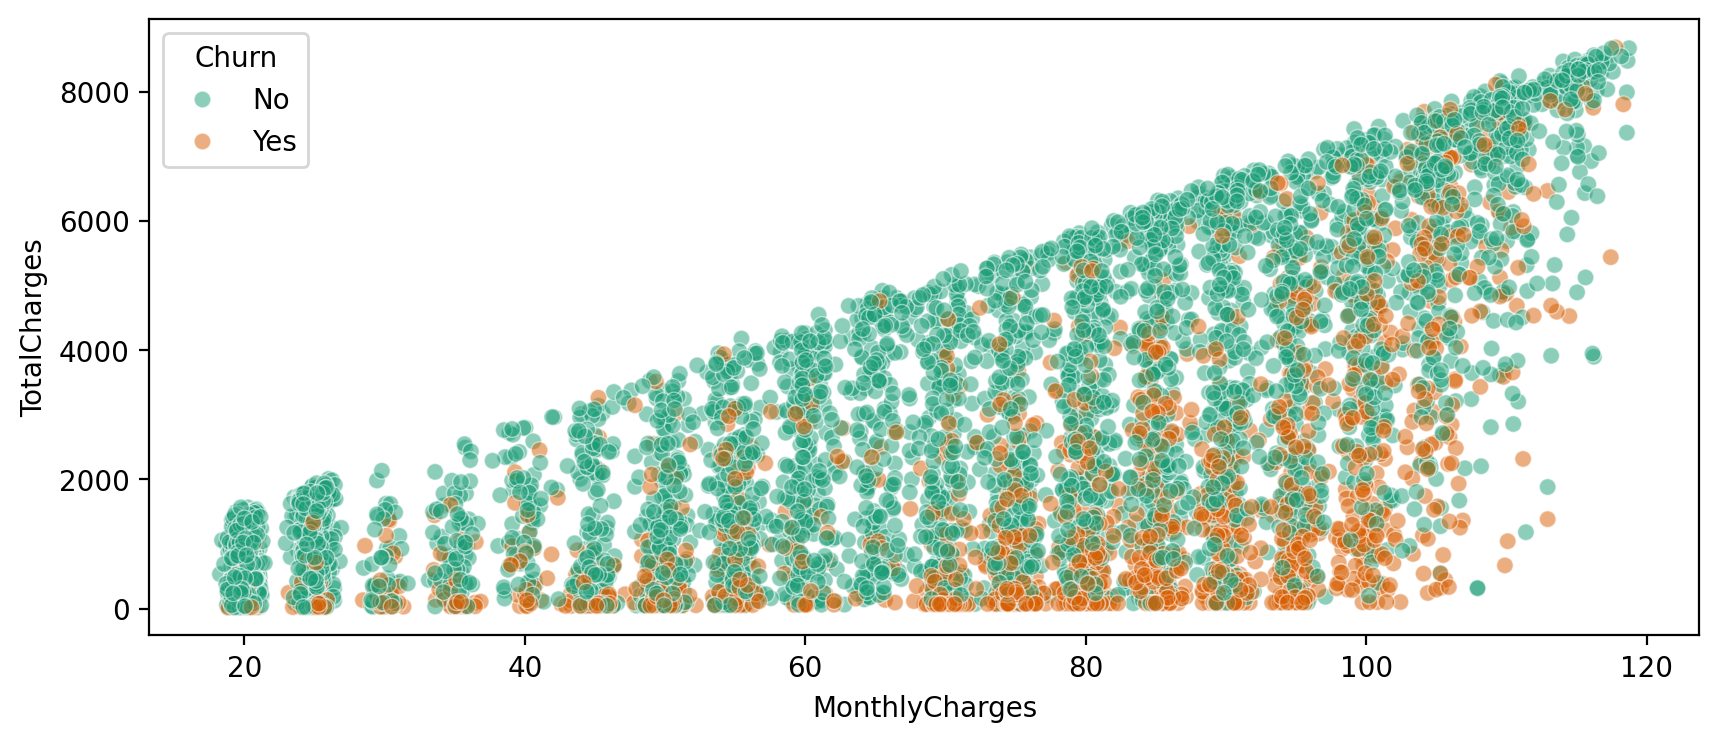

In [55]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

In [66]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [67]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [68]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

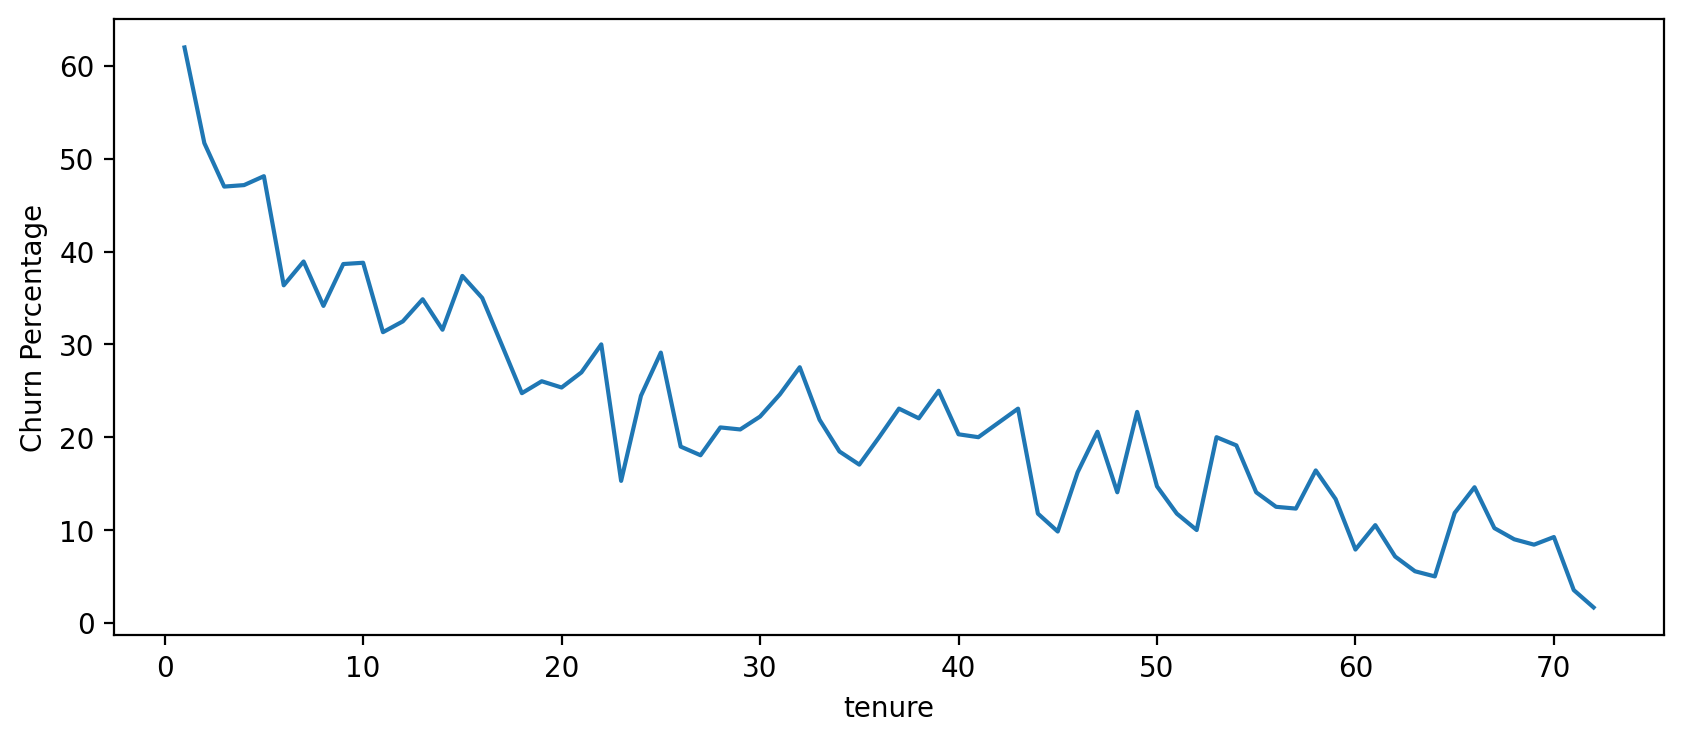

In [69]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [70]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [71]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [73]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

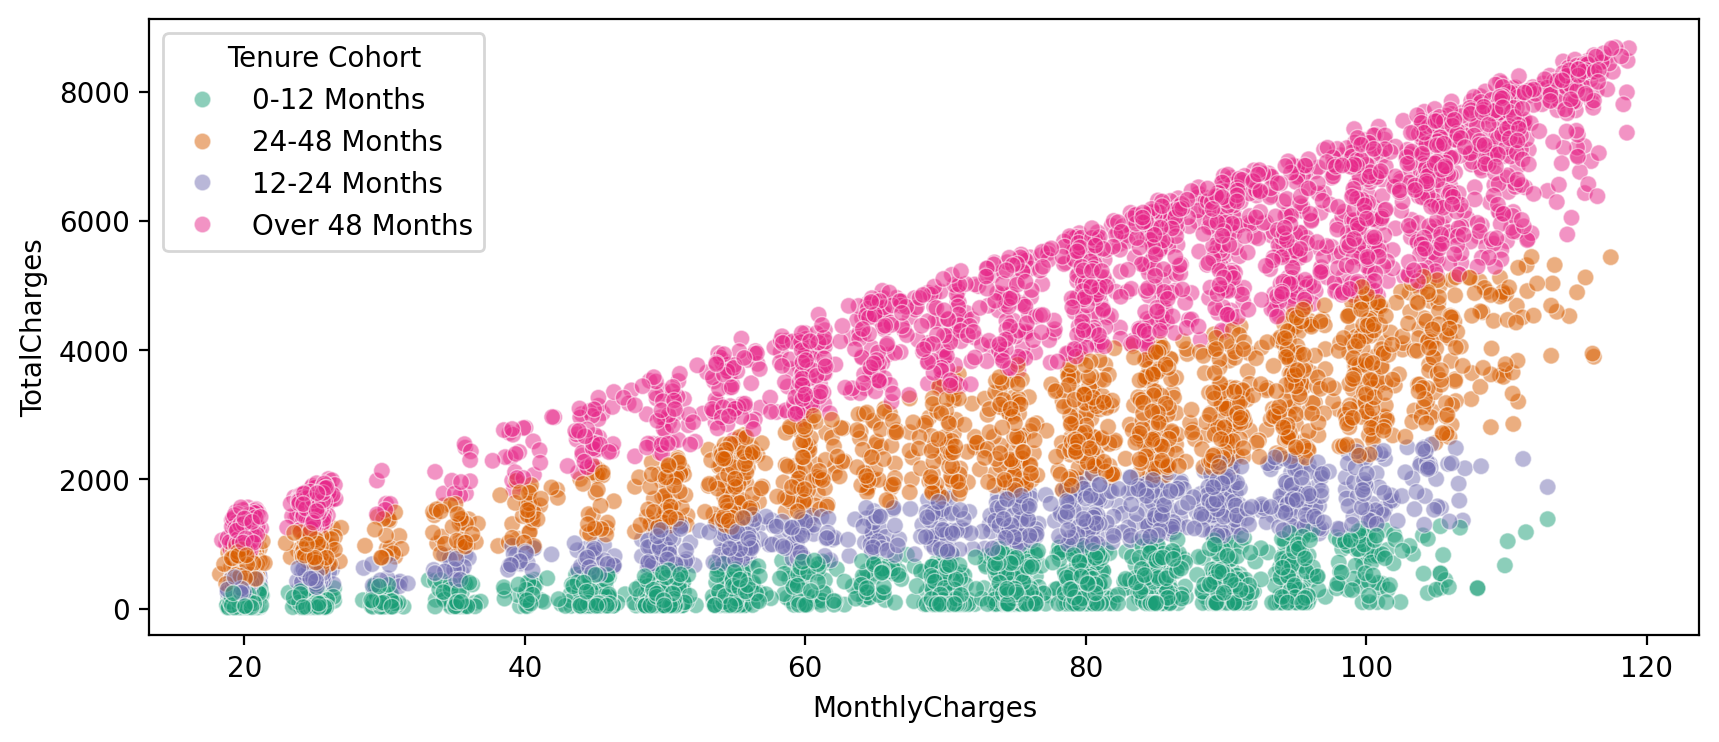

In [74]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

<Axes: xlabel='Tenure Cohort', ylabel='count'>

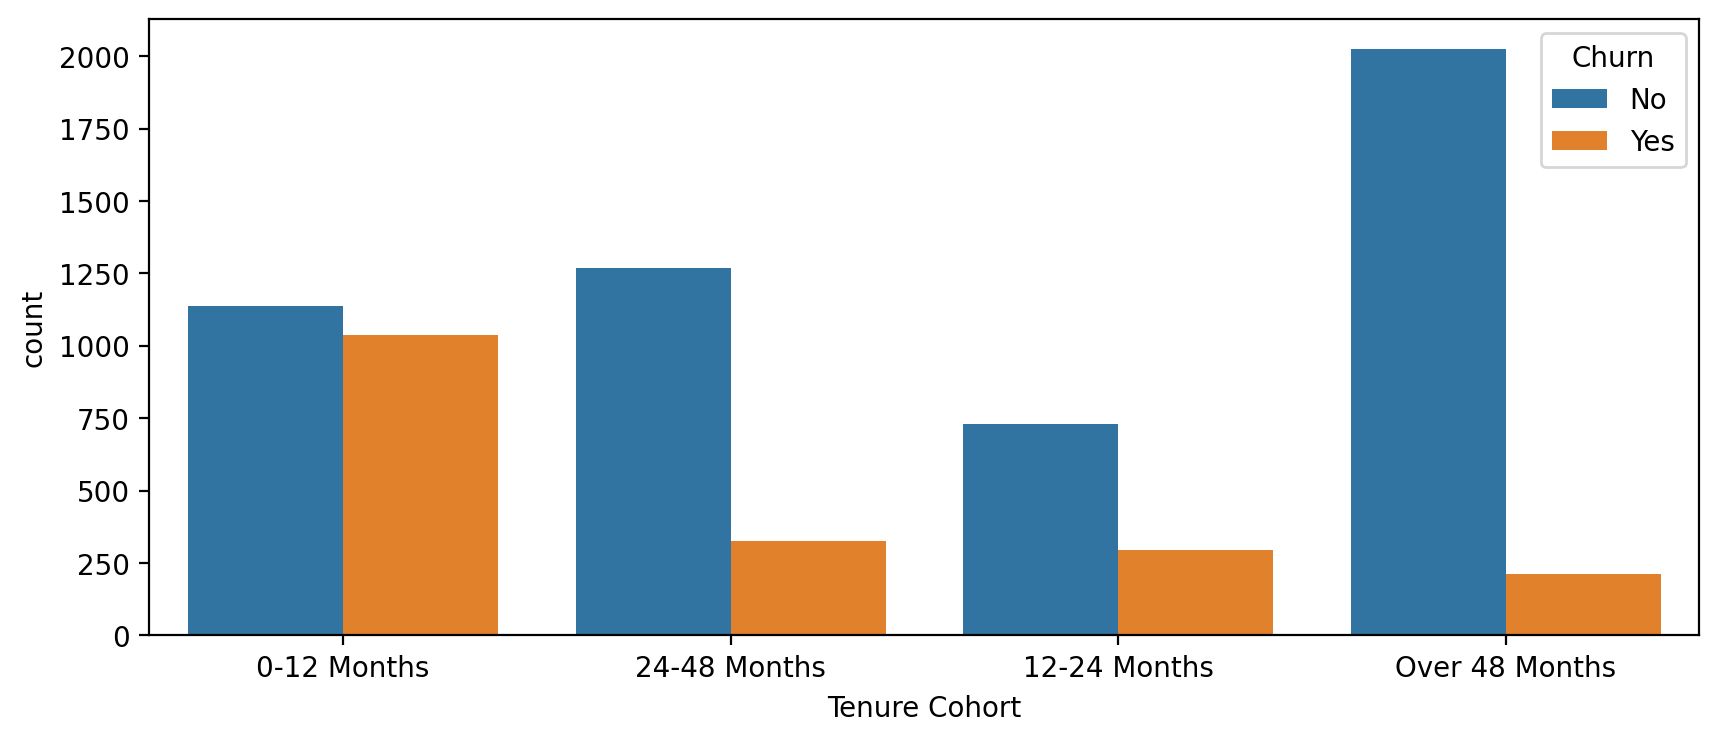

In [75]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

<Figure size 2000x800 with 0 Axes>

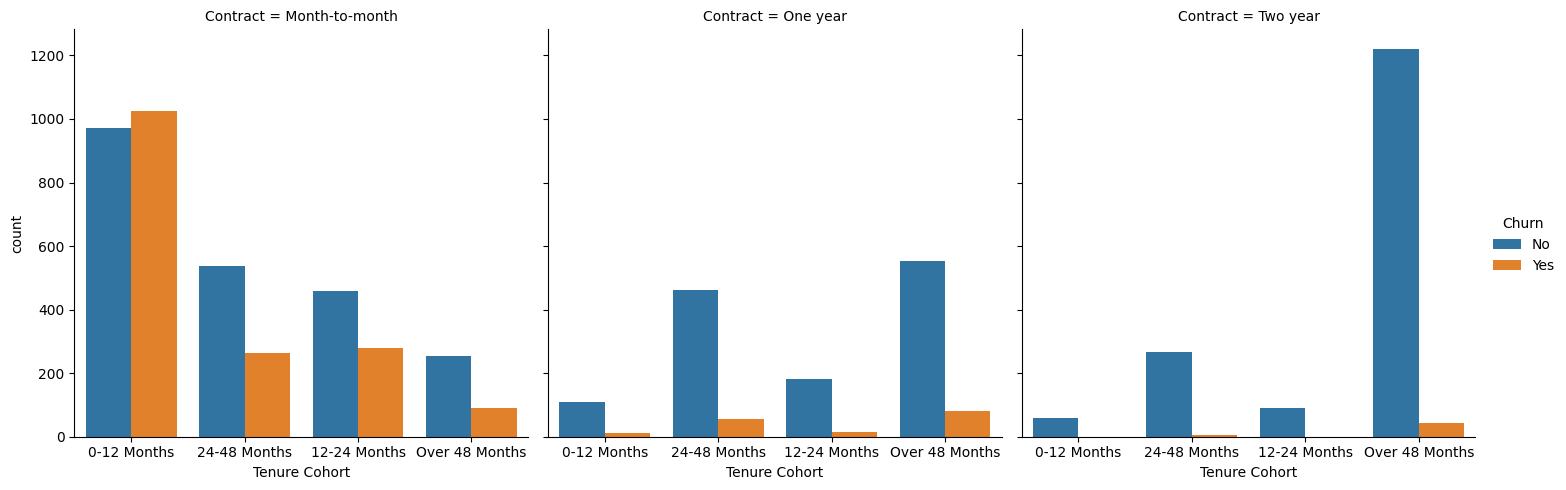

In [76]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

In [77]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [78]:
y = df['Churn']

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [81]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [94]:
tree_models = [ RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier]

In [102]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [105]:
def report_tree_model(model):
    print(model.__name__)
    my_model = model()
    my_model.fit(X_train, y_train)
    y_pred = my_model.predict(X_test)
    print(classification_report(y_pred=y_pred, y_true=y_test))
    matrix = ConfusionMatrixDisplay(confusion_matrix(y_pred=y_pred, y_true=y_test))
    matrix.plot()
    plt.show()


RandomForestClassifier
              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.50      0.44      0.47       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.67       704
weighted avg       0.78      0.79      0.79       704



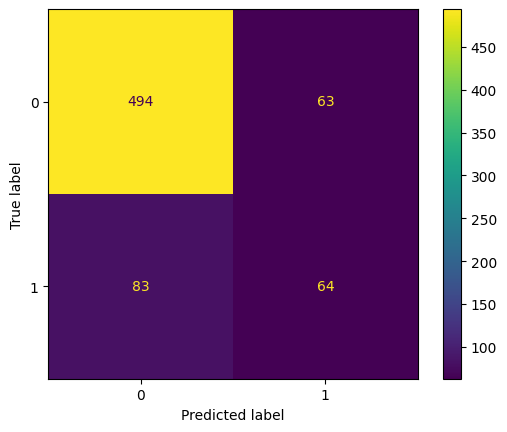

AdaBoostClassifier


c:\Users\honor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



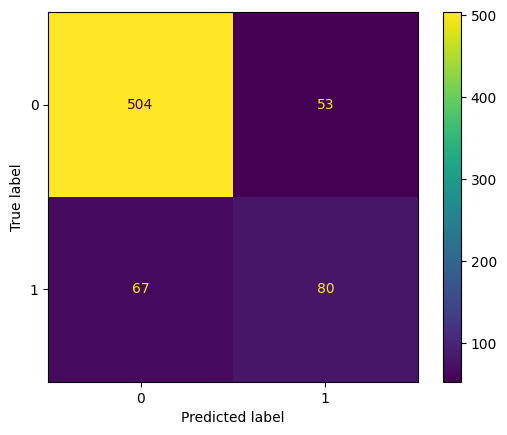

GradientBoostingClassifier
              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



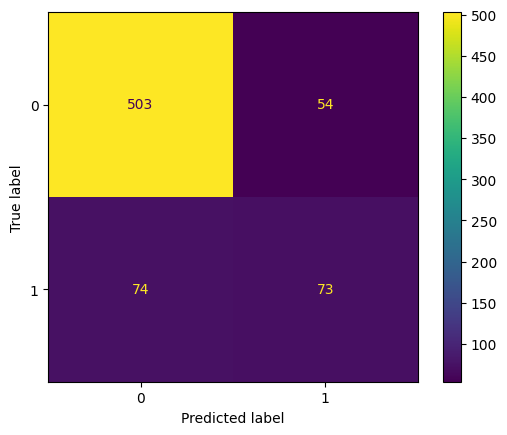

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.86      0.80      0.83       557
         Yes       0.40      0.49      0.44       147

    accuracy                           0.74       704
   macro avg       0.63      0.65      0.63       704
weighted avg       0.76      0.74      0.75       704



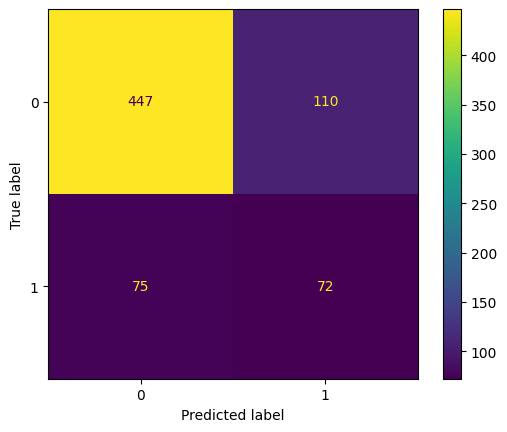

In [104]:
for model in tree_models:
    report_tree_model(model)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [107]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [121]:

svc = SVC()
svc.fit(scaler_X_train, y_train)
y_pred = svc.predict(scaler_X_test)

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.60      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



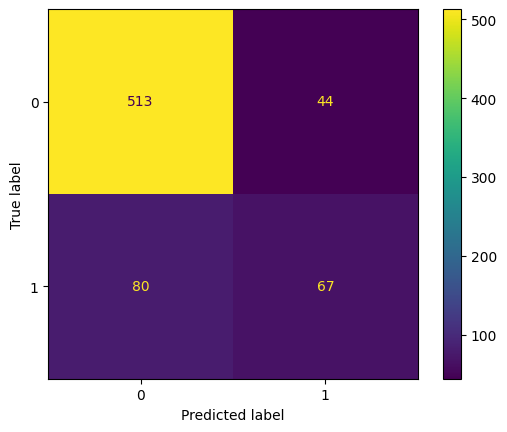

In [122]:
print(classification_report(y_pred=y_pred, y_true=y_test))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_pred=y_pred, y_true=y_test))
matrix.plot()
plt.show()

In [123]:
knc = KNeighborsClassifier()
knc.fit(scaler_X_train, y_train)
y_pred = knc.predict(scaler_X_test)

              precision    recall  f1-score   support

          No       0.87      0.86      0.86       557
         Yes       0.49      0.52      0.50       147

    accuracy                           0.79       704
   macro avg       0.68      0.69      0.68       704
weighted avg       0.79      0.79      0.79       704



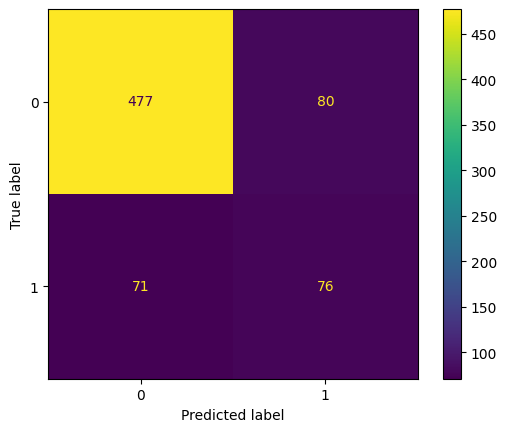

In [124]:
print(classification_report(y_pred=y_pred, y_true=y_test))
matrix = ConfusionMatrixDisplay(confusion_matrix(y_pred=y_pred, y_true=y_test))
matrix.plot()
plt.show()

In [ ]:
ы